Nombre: Rosa Garrote Jofré



In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as ss

In [ ]:
df = pd.read_excel('/content/vehiculos_inscritos_2022_Atacama1.xltx')
df.head()

,dia_solicitud,mes_solicitud,anio_solicitud,numero_region,nombre_region,tipo,descripcion_tipo,marca,modelo,version,color,anio_fabricacion,estado_solicitud,combustible,numero_puertas,numero_asientos,carga,comuna_adquisicion
0,2,11,2022,3,III - Atacama,CMNT,Camioneta,JAC,T8,T8 PRO TM 4X4 2.0,PLATEADO PLATA,2023,ACEPTADA,DIESEL,4,5,900.0,CALDERA
1,22,11,2022,3,III - Atacama,STW,SUV,CHANGAN,CS35 PLUS,CS35 1.6,PLATEADO PLATA,2023,INGRESADA,GASOLINA,0,0,0.0,COPIAPÓ
2,14,11,2022,3,III - Atacama,CMNT,Camioneta,MITSUBISHI,L-200,L200 DAKAR 4X4 DCAB 2.4 AUT,GRIS GRAFITO,2023,ACEPTADA,DIESEL,4,5,940.0,COPIAPÓ
3,4,11,2022,3,III - Atacama,CMNT,Camioneta,CHEVROLET,COLORADO,COLORADO 4X4 2.8 AUT,BLANCO,2023,ACEPTADA,DIESEL,4,4,974.0,DIEGO DE ALMAGRO
4,24,11,2022,3,III - Atacama,STW,SUV,MG,MG ZX,ZX 1.5,AZUL METALIZADO,2023,INGRESADA,GASOLINA,5,5,0.0,COPIAPÓ


PROBLEMA 01

Estimación de proporciones — Tipo de vehículo La Dirección de Transporte desea estimar la proporción de vehículos de tipo Camioneta registrados en la Región de Atacama.

1- Estime la proporción muestral de vehículos cuyo tipo es "Camioneta" (descripcion_tipo == 'Camioneta').

In [ ]:
x = sum(df['descripcion_tipo'] == 'Camioneta')
n = len(df)
p_muestral = x/n
print(f'La proporción muestral de vehículos cuya descripción es Camioneta es {p_muestral:.3f}')

La proporción muestral de vehículos cuya descripción es Camioneta es 0.197


2- Construya un intervalo de confianza al 95% para la proporción de camionetas registradas en 2022.

In [ ]:
li, ls = ss.norm.interval(confidence = 0.95, loc = p_muestral, scale = np.sqrt(p_muestral*(1-p_muestral)/n))
print(f'El intervalo de confianza al 95% para la proporción de camionetas registradas en 2022 esta entre {li:.2%} y {ls:.2%}')

El intervalo de confianza al 95% para la proporción de camionetas registradas en 2022 esta entre 18.49% y 21.00%


3- Interprete el intervalo obtenido y explique qué condiciones deben cumplirse para que sea válido.

El intervalo de confianza respecto a la proporción de vehículos de tipo camioneta registradas en el 2022 esta entre el 18 y 21%, considerando un intervalo de confianza de 95% en una muestra correspondiente a una región en específico. Para que esto se pueda cumplir se debe considerar que la selección de la muestra debe ser aleatoria, con un tamaño muestral que cumpla las condiciones de las proporciones n * p es igual o mayor a 10.

PROBLEMA 02

Se desea analizar la distribución de la carga útil de los vehículos registrados con solicitud aceptada en la Región de Atacama, considerando que la variable carga (en kilogramos) es continua y se aproxima a una distribución normal.

1- Calcule la media y la desviación estándar muestral de la variable carga, considerando solo los vehículos cuya solicitud fue "ACEPTADA" y con valores no nulos de carga.

In [ ]:
mu, sigma = df[df['estado_solicitud'] == 'ACEPTADA']['carga'].agg(['mean', 'std'])
print(f'La media es {mu:.4f} kilogramos y la desviación estándar es {sigma:.4f} kilogramos.')

La media es 839.1060 kilogramos y la desviación estándar es 3386.4115 kilogramos.


2- Suponga que la carga útil sigue una distribución normal. Calcule la probabilidad de que un vehículo tenga una carga útil:

menor a 700 kg,

entre 800 kg y 1000 kg,

mayor a 1200 kg.

In [ ]:
# P(X < 700)
p2_2_1 = ss.norm.cdf(x = 700, loc = mu, scale = sigma)
print(f'La probabilidad de que una carga tenga un peso menor a 700 kg es {p2_2_1:.2%}.')

La probabilidad de que una carga tenga un peso menor a 700 kg es 48.36%.


In [ ]:
# P(800 < X < 1000) = P(X < 1000) - P(X < 800)
p2_2_2 = ss.norm.cdf(x = 1000, loc = mu, scale = sigma) - ss.norm.cdf(x = 800, loc = mu, scale = sigma)
print(f'La probabilidad de que un vehículo tenga un peso entre 800 kg y 1000 kg es {p2_2_2:.2%}.')

La probabilidad de que un vehículo tenga un peso entre 800 kg y 1000 kg es 2.36%.


In [ ]:
# P(X > 100)
p2_2_3_2 = ss.norm.sf(x = 1200, loc = mu, scale = sigma)
print(f'La probabilidad de que un vehículo tenga una carga mayor a 1200 kg es {p2_2_3_2:.2%}.')

La probabilidad de que un vehículo tenga una carga mayor a 1200 kg es 45.76%.


3- Represente gráficamente la distribución normal obtenida con sus parámetros.

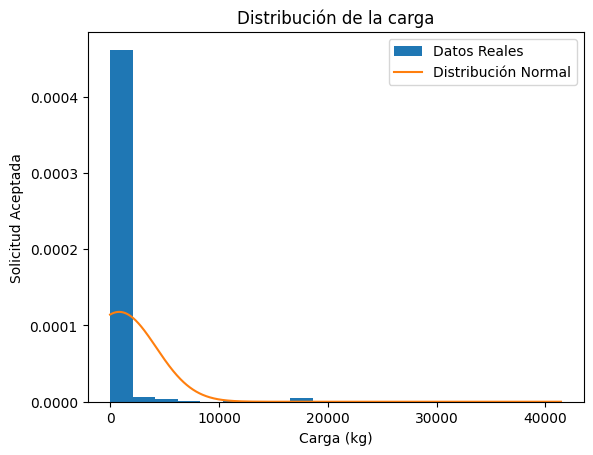

In [ ]:
df2_3 = df[df['estado_solicitud'] == 'ACEPTADA']['carga']
x = np.linspace(df2_3.min(), df2_3.max(), 1000)
pdf = ss.norm.pdf(x, loc = mu, scale = sigma)

plt.hist(df2_3, bins = 20, density = True, label = 'Datos Reales')
plt.plot(x, pdf, label = 'Distribución Normal')
plt.title('Distribución de la carga')
plt.xlabel('Carga (kg)')
plt.ylabel('Solicitud Aceptada')
plt.legend()
plt.show()

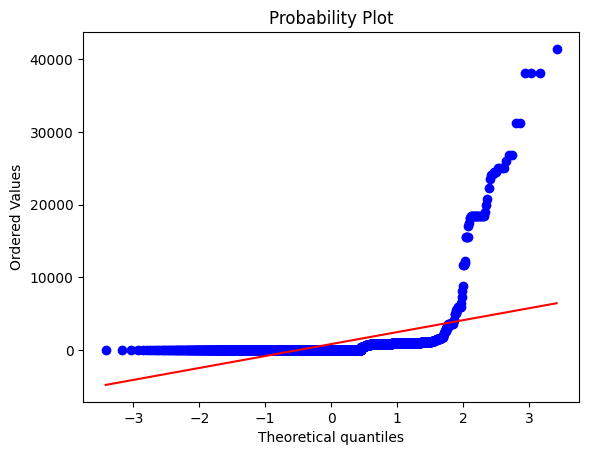

In [ ]:
ss.probplot(df2_3, dist = 'norm', plot = plt)
plt.show()

¿Qué tan bien se ajusta el modelo de distribución normal a la distribución real de los datos? Justifique su respuesta considerando la forma, simetría y dispersión de la curva comparada con las barras del histograma.¿Qué información útil aporta la curva normal teórica sobre la distribución de la variable carga, especialmente en relación con la media?

Desde el gráfico observado podemos deducir que la distribución desde la variable "carga" es mayormente asimétrica y sesgada hacia la derecha, pues se concentra en el lado de valores bajos, por lo que dicha distribución no seria normal.
Otro punto a considerar es la dispersión de la curva, donde observamos que en este caso la curva no está distribuida de forma equilibrada, por lo que el valor medio no se puede evidenciar claramente porque esta no refleja un punto de frecuencia respecto a los datos o moda, dado que gran parte de las cargas estan por debajo de la media.

PROBLEMA 03

Un analista quiere modelar probabilísticamente el número de vehículos que utilizan gasolina como combustible en muestras aleatorias de vehículos inscritos en la Región de Atacama. Para esto, se usa un modelo de distribución binomial.

Se sabe que en la base de datos, aproximadamente el 62.3
 de los vehículos utilizan gasolina.

Suponga que se toma una muestra aleatoria de 20 vehículos inscritos. Modele la variable aleatoria X ~ Bin(n=20, p=0.623), donde X es el número de vehículos a gasolina en la muestra.


1- Calcule la probabilidad de que exactamente 10 de los 20 vehículos utilicen gasolina.

In [ ]:
# P(X = 10)
p3_2_1 = ss.binom.pmf(k = 10, n = 20, p = 0.623)
print(f'La probabilidad de que exactamente 10 de 20 vehículos utilicen gasolina es {p3_2_1:.2%}.')

La probabilidad de que exactamente 10 de 20 vehículos utilicen gasolina es 9.44%.


2- Calcule la probabilidad de que al menos 15 utilicen gasolina.

In [ ]:
# P(X >= 15) = 1 - P(X <= 14)
p3_2_2 = 1 - ss.binom.cdf(k = 14, n = 20, p = 0.623)
print(f'La probabilidad de que al menos 15 vehículos utilicen gasolina es {p3_2_2:.2%}.')

La probabilidad de que al menos 15 vehículos utilicen gasolina es 17.40%.


3- Calcule la probabilidad de que entre 12 y 16 (inclusive) utilicen gasolina.

In [ ]:
# P(12 <= X <= 16) = P(X <= 16) - P(X <=11)
p3_2_3 = ss.binom.cdf(k = 16, n = 20, p = 0.623) - ss.binom.cdf(k = 11, n = 20, p = 0.623)
print(f'La probabilidad de que entre 12 y 16 (inclusive) utilicen gasolina es {p3_2_3:.2%}.')

La probabilidad de que entre 12 y 16 (inclusive) utilicen gasolina es 65.01%.


4- Grafique la distribución binomial , es decir, la función de masa de probabilidad (pmf) Interprete el comportamiento de esta variable aleatoria. ¿Es simétrica? ¿Cuál es el valor más probable (moda)?

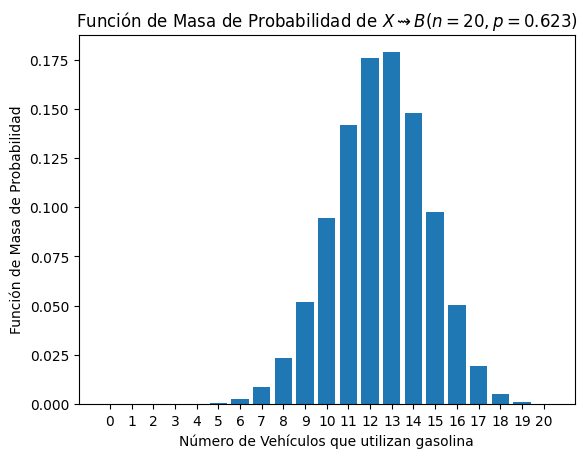

In [ ]:
plt.bar(x, fmp)
plt.title(f'Función de Masa de Probabilidad de $X \leadsto B(n = 20, p = 0.623)$')
plt.xlabel('Número de Vehículos que utilizan gasolina')
plt.ylabel('Función de Masa de Probabilidad')
plt.xticks(x)
plt.show()

Interprete el comportamiento de esta variable aleatoria. ¿Es simétrica? ¿Cuál es el valor más probable (moda)?

El gráfico de distribución binominal que podemos observar, demuestra una distribución casi simétrica, donde está ligeramente sesgada hacia la izquierda, por lo que no es completamente simétrica pero si se acerca mucho.
Por otra parte, el valor más probable (moda) se encuentra alrededor de x = 12.
En conclusión la muestra de 20 vehículos indica que 12 de estos utilizan gasolina, concentrándose la probabilidad en este valor como media.
